<a href="https://colab.research.google.com/github/Radhe3108/Mentorness_Internship/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task : Disease Prediction
        DATASETS : Health attributes dataset aids disease diagnosis.

        OBJECTIVES : Develop ML model for accurate
        classification of diseased vs. non-diseased individuals.
        
        DATA INCLUDES : Attributes include cholesterol, blood cell
        counts, hormone levels, and more.
        
        TASK : Build predictive model; evaluate using accuracy, precision, recall, and F1-score.
        
        OUTCOME : Develop tool for early disease detection, improving patient outcomes
        and reducing healthcare costs.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
train_df= pd.read_csv('Train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [ ]:
train_df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [ ]:
test_df[]

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [ ]:
train_df.isna().sum()
test_df.isna().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [ ]:
data_types_train = train_df.dtypes
data_types_train

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [ ]:
data_types_test = test_df.dtypes
data_types_test

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [ ]:
categorical_cols = data_types_test[data_types_test == 'object'].index.tolist()
print("Categorical Columns:", categorical_cols)


for index, value in train_df['Disease'].items():
    # Convert 'healthy' to 0 and any disease to 1
    if value == 'Healthy':
        train_df.at[index, 'Status_binary'] = 0
    else:
        train_df.at[index, 'Status_binary'] = 1



Categorical Columns: ['Disease']


In [ ]:
categorical_cols = data_types_test[data_types_test == 'object'].index.tolist()
print("Categorical Columns:", categorical_cols)


for index, value in test_df['Disease'].items():
    # Convert 'Healthy' to 0 and any disease to 1
    if value == 'Healthy':
        test_df.at[index, 'Status_binary'] = 0
    else:
        test_df.at[index, 'Status_binary'] = 1


Categorical Columns: ['Disease']


In [ ]:
print("Updated DataFrame in train datasets:")
print(train_df.iloc[:,-1])

print("Updated DataFrame in test datasets:")
print(test_df.iloc[:,-1])

Updated DataFrame in train datasets:
0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2346    1.0
2347    1.0
2348    1.0
2349    1.0
2350    1.0
Name: Status_binary, Length: 2351, dtype: float64
Updated DataFrame in test datasets:
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
481    1.0
482    1.0
483    1.0
484    1.0
485    1.0
Name: Status_binary, Length: 486, dtype: float64


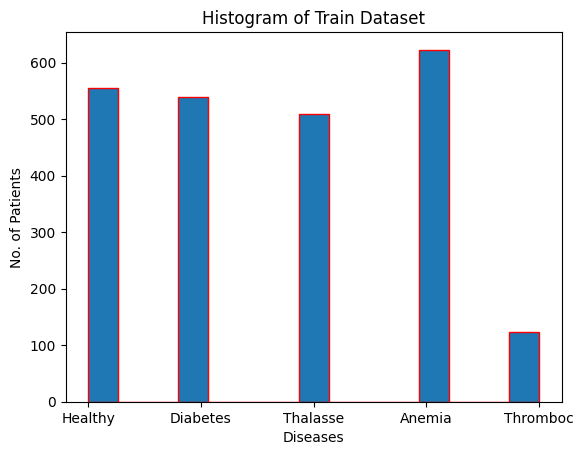

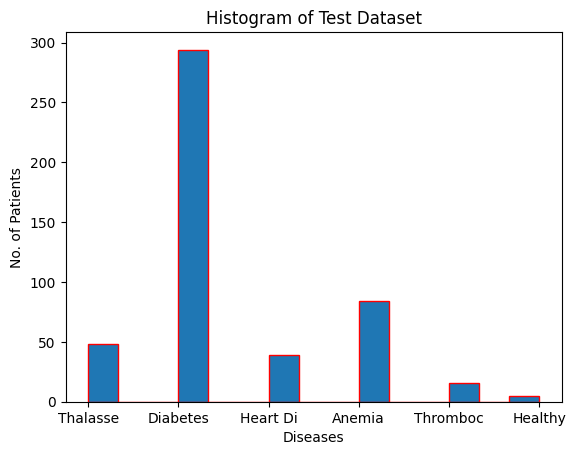

In [ ]:
plt.hist(train_df['Disease'] , bins=15, edgecolor='red')
plt.xlabel('Diseases')
plt.ylabel('No. of Patients')
plt.title('Histogram of Train Dataset')
plt.show()

plt.hist(test_df['Disease'] , bins=15, edgecolor='red')
plt.xlabel('Diseases')
plt.ylabel('No. of Patients')
plt.title('Histogram of Test Dataset')
plt.show()

In [ ]:
X_train = train_df.drop(columns=['Disease', 'Status_binary'])
y_train = train_df['Status_binary']
X_test = test_df.drop(columns=['Disease', 'Status_binary'])
y_test = test_df['Status_binary']

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

y_pred_logistic = logistic_regression_model.predict(X_test)

precision_lr = precision_score(y_test, y_pred_logistic)
recall_lr = recall_score(y_test, y_pred_logistic)
f1_lr = f1_score(y_test, y_pred_logistic)
accuracy_lr = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression:")
print("Accuracy of Logistic Regression:", accuracy_lr)
print("  Precision:", precision_lr)
print("  Recall:", recall_lr)
print("  F1-score:", f1_lr)

Logistic Regression:
Accuracy of Logistic Regression: 0.7283950617283951
  Precision: 0.9943342776203966
  Recall: 0.7297297297297297
  F1-score: 0.8417266187050361


In [ ]:
#SVM

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7839506172839507
Precision: 0.9973544973544973
Recall: 0.7837837837837838
F1-score: 0.8777648428405123
